In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

data= pd.read_csv("data13.csv", dtype=float)
data_phr= pd.read_csv("phr2.csv",usecols=[2])

data_join= data.join(data_phr)
data_join= data_join.dropna(axis=0,how='any')

data_join.ph1[data_join['ph1']=='-0']=0
#data=data.dropna(axis=0,how='any')
dataset= data_join.drop(['phreat','d1ndwi','d2ndwi','d1evi','d2evi','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','evapot','elevation','gwlvl','t1','t2','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2)
print(len(train_set), "train +", len(test_set), "test")

C:\Users\Zikei\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


128716 train + 32179 test


In [3]:
train_set.head()

,x,y,prec,ndvi,temp,ndwi,evi,soilmo,sat0,sat1,sat2,sat3,sat4,ph1
86881,374.0,226.0,11.3205,3785.0,11.4500,-0.0028,0.1423,0.0801,-81.3611,-166.5000,-224.6389,-300.2500,-246.1944,219.4181
2815,12.0,62.0,16.2615,2497.0,6.2135,-0.0720,0.1095,0.2932,63.4167,72.0833,69.5278,-38.4722,132.6111,0.0000
74333,320.0,186.0,10.5640,983.0,10.8595,0.0126,0.0591,0.3049,85.7500,69.8889,102.3056,132.5833,301.0833,-0.0000
78641,338.0,450.0,13.9865,1679.0,8.6485,-0.0521,0.1195,0.1282,-19.9444,-43.4167,-43.0278,19.0278,74.8889,0.0000
146488,630.0,656.0,7.3040,1132.0,11.1185,-0.0265,0.0772,0.0843,15.7500,75.7500,116.4722,88.2778,140.0833,0.0000


In [4]:
#X_training = train_set.drop(['phreat','x','y','d1ndwi','d2ndwi','d1evi','d2evi','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','gwlvl','t1','t2','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)
X_training = train_set.drop(['ph1','x','y'],axis=1)
Y_training = train_set [['ph1']].values

#X_testing = test_set.drop(['phreat','x','y','d1ndwi','d2ndwi','d1evi','d2evi','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','gwlvl','t1','t2','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)
X_testing = test_set.drop(['ph1','x','y'],axis=1)
Y_testing = test_set [['ph1']].values

#X_final = data.drop(['phreat','x','y','d1ndwi','d2ndwi','d1evi','d2evi','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','gwlvl','t1','t2','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)
X_final = dataset.drop(['ph1','x','y'],axis=1)
Y_final = dataset [['ph1']].values

from sklearn.preprocessing import MinMaxScaler
# All data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well. Create scalers for the inputs and outputs.
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

# It's very important that the training and test data are scaled with the same scaler.
X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

X_scaled_final = X_scaler.transform(X_final)
Y_scaled_final = Y_scaler.transform(Y_final)

In [5]:
print(X_scaled_training.shape)
print(Y_scaled_training.shape)

print(X_scaled_testing.shape)
print(Y_scaled_testing.shape)


print(X_scaled_final.shape)
print(Y_scaled_final.shape)

print("Note: Y values were scaled by multiplying by {:.10f} and adding {:.4f}".format(Y_scaler.scale_[0], Y_scaler.min_[0]))

(128716, 11)
(128716, 1)
(32179, 11)
(32179, 1)
(160895, 11)
(160895, 1)
Note: Y values were scaled by multiplying by 0.0022438313 and adding 0.2196


In [6]:
print(X_scaled_training)

[[0.0739537  0.54998332 0.80039725 ... 0.50954106 0.42815825 0.38816272]
 [0.12885644 0.40676081 0.48992055 ... 0.51850444 0.43959632 0.40389401]
 [0.06554772 0.23840765 0.76538598 ... 0.5195032  0.44707039 0.41089043]
 ...
 [0.1041441  0.27665962 0.77208585 ... 0.51725939 0.44045684 0.39995801]
 [0.08145963 0.44323363 0.69370331 ... 0.51660512 0.44066196 0.40375788]
 [0.0864821  0.3749583  0.68961224 ... 0.51798898 0.4445847  0.40604657]]


In [7]:
X_training.head()

,prec,ndvi,temp,ndwi,evi,soilmo,sat0,sat1,sat2,sat3,sat4
86881,11.3205,3785.0,11.4500,-0.0028,0.1423,0.0801,-81.3611,-166.5000,-224.6389,-300.2500,-246.1944
2815,16.2615,2497.0,6.2135,-0.0720,0.1095,0.2932,63.4167,72.0833,69.5278,-38.4722,132.6111
74333,10.5640,983.0,10.8595,0.0126,0.0591,0.3049,85.7500,69.8889,102.3056,132.5833,301.0833
78641,13.9865,1679.0,8.6485,-0.0521,0.1195,0.1282,-19.9444,-43.4167,-43.0278,19.0278,74.8889
146488,7.3040,1132.0,11.1185,-0.0265,0.0772,0.0843,15.7500,75.7500,116.4722,88.2778,140.0833


In [8]:
import tensorflow as tf
# Define model parameters
learning_rate = 0.005
training_epochs = 2000
display_step = 100

# Define how many inputs and outputs are in our neural network
number_of_inputs =11
number_of_outputs =1

# Define how many neurons we want in each layer of our neural network
layer_1_nodes =100
layer_2_nodes =500
layer_3_nodes =100
#layer_4_nodes =10

In [9]:
# Input Layer
with tf.variable_scope('input'):
    X = tf.placeholder(tf.float32, shape=(None, number_of_inputs))

In [10]:
# Layer 1
with tf.variable_scope('layer_1'):
    weights = tf.get_variable(name="weights1", shape=[number_of_inputs, layer_1_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases1", shape=[layer_1_nodes], initializer=tf.zeros_initializer())
    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)
    
    # Layer 2
with tf.variable_scope('layer_2'):
    weights = tf.get_variable(name="weights2", shape=[layer_1_nodes, layer_2_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases2", shape=[layer_2_nodes], initializer=tf.zeros_initializer())
    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)

# Layer 3
with tf.variable_scope('layer_3'):
    weights = tf.get_variable(name="weights3", shape=[layer_2_nodes, layer_3_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases3", shape=[layer_3_nodes], initializer=tf.zeros_initializer())
    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)

# Layer 4
#with tf.variable_scope('layer_3'):
 #   weights = tf.get_variable(name="weights4", shape=[layer_3_nodes, layer_4_nodes], initializer=tf.contrib.layers.xavier_initializer())
  #biases = tf.get_variable(name="biases4", shape=[layer_4_nodes], initializer=tf.zeros_initializer())
    #layer_4_output = tf.nn.relu(tf.matmul(layer_3_output, weights) + biases)
    
# Output Layer
with tf.variable_scope('output'):
    weights = tf.get_variable(name="weights4", shape=[layer_3_nodes, number_of_outputs], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases4", shape=[number_of_outputs], initializer=tf.zeros_initializer())
    prediction = tf.matmul(layer_3_output, weights) + biases


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Section Two: Define the cost function of the neural network that will measure prediction accuracy during training

with tf.variable_scope('cost'):
    Y = tf.placeholder(tf.float32, shape=(None, 1))
#    cost = tf.reduce_sum(tf.square(tf.subtract(prediction, Y)))
#    cross_entropy = -tf.reduce_sum(Y*tf.log(prediction))
    cost = tf.reduce_mean(tf.squared_difference(prediction, Y))
#with tf.variable_scope('accuracy'):
 #   correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))
  #  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [12]:
# Section Three: Define the optimizer function that will be run to optimize the neural network

with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [13]:
saver = tf.train.Saver()

In [14]:
# Initialize a session so that we can run TensorFlow operations
with tf.Session() as session:

    # Run the global variable initializer to initialize all variables and layers of the neural network
    session.run(tf.global_variables_initializer())

    # Create log file writers to record training progress.
    # We'll store training and testing log data separately.
    #training_writer = tf.summary.FileWriter('./logs/training', session.graph)
    #testing_writer = tf.summary.FileWriter('./logs/testing', session.graph)

    # Run the optimizer over and over to train the network.
    # One epoch is one full run through the training data set.
    for epoch in range(training_epochs):

        # Feed in the training data and do one step of neural network training
        session.run(optimizer, feed_dict={X: X_scaled_training, Y: Y_scaled_training})

        # Every 100 training steps, log our progress
        if epoch % 25 == 0:
            # Get the current accuracy scores by running the "cost" operation on the training and test data sets
            training_cost = session.run(cost, feed_dict={X: X_scaled_training, Y:Y_scaled_training})
            testing_cost = session.run(cost, feed_dict={X: X_scaled_testing, Y:Y_scaled_testing})
            #testing_accuracy = session.run(accuracy, feed_dict={X: X_scaled_testing, Y:Y_scaled_testing})
        # Write the current training status to the log files (Which we can view with TensorBoard)
            #training_writer.add_summary(training_summary, epoch)
            #testing_writer.add_summary(testing_summary, epoch)
            
            # Print the current training status to the screen
            print("Epoch: {} - Training Cost: {}  Testing Cost: {}".format(epoch, training_cost, testing_cost))
            #print("Epoch: {} -  Accuracy:{}".format(epoch, testing_accuracy))

    # Training is now complete!

    # Get the final accuracy scores by running the "cost" operation on the training and test data sets
    final_training_cost = session.run(cost, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
    final_testing_cost = session.run(cost, feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})
    #final_test_acc= session.run(accuracy, feed_dict={X: X_scaled_final, Y: Y_scaled_final})
    
    #print("test accuracy",final_test_acc)
    print("Final Training cost: {}".format(final_training_cost))
    print("Final Testing cost: {}".format(final_testing_cost))

    # Now that the neural network is trained, let's use it to make predictions for our test data.
    
    
    # Now that the neural network is trained, let's use it to make predictions for our test data
    # Pass in the X testing data and run the "prediciton" operation
    Y_predicted_test_scaled = session.run(prediction, feed_dict={X: X_scaled_testing})

    # Unscale the data back to it's original units (dollars)
    Y_test_predicted = Y_scaler.inverse_transform(Y_predicted_test_scaled)
    
    # Now that the neural network is trained, let's use it to make predictions for our test data
    # Pass in the X testing data and run the "prediciton" operation
    Y_predicted_train_scaled = session.run(prediction, feed_dict={X: X_scaled_training})

    # Unscale the data back to it's original units (dollars)
    Y_train_predicted = Y_scaler.inverse_transform(Y_predicted_train_scaled)
    
    
    # Pass in the X testing data and run the "prediciton" operation
    Y_predicted_scaled = session.run(prediction, feed_dict={X: X_scaled_final})

    # Unscale the data back to it's original units (dollars)
    Y_predicted = Y_scaler.inverse_transform(Y_predicted_scaled)


Epoch: 0 - Training Cost: 0.39271080493927  Testing Cost: 0.3937804698944092
Epoch: 25 - Training Cost: 0.018209068104624748  Testing Cost: 0.017905164510011673
Epoch: 50 - Training Cost: 0.016980396583676338  Testing Cost: 0.016635309904813766
Epoch: 75 - Training Cost: 0.016813291236758232  Testing Cost: 0.01646900363266468
Epoch: 100 - Training Cost: 0.01661679707467556  Testing Cost: 0.01627160981297493
Epoch: 125 - Training Cost: 0.016462484374642372  Testing Cost: 0.016119590029120445
Epoch: 150 - Training Cost: 0.016327999532222748  Testing Cost: 0.0159900039434433
Epoch: 175 - Training Cost: 0.016206277534365654  Testing Cost: 0.01587674394249916
Epoch: 200 - Training Cost: 0.016147004440426826  Testing Cost: 0.015830209478735924
Epoch: 225 - Training Cost: 0.016214463859796524  Testing Cost: 0.01590723916888237
Epoch: 250 - Training Cost: 0.016015728935599327  Testing Cost: 0.01573222130537033
Epoch: 275 - Training Cost: 0.015925273299217224  Testing Cost: 0.01565767265856266


In [15]:
for i in range(100):
    print( "Actual phreatophyte",Y_final[i],"  Predicted",Y_predicted[i][0])

Actual phreatophyte [-0.]   Predicted 3.013483
Actual phreatophyte [0.]   Predicted 3.921181
Actual phreatophyte [0.]   Predicted 4.823101
Actual phreatophyte [0.]   Predicted 5.220595
Actual phreatophyte [0.]   Predicted 3.8792236
Actual phreatophyte [0.]   Predicted 7.821993
Actual phreatophyte [-0.]   Predicted 6.5527883
Actual phreatophyte [-0.]   Predicted 6.4825273
Actual phreatophyte [-0.]   Predicted 6.632055
Actual phreatophyte [0.]   Predicted 9.355991
Actual phreatophyte [0.]   Predicted 7.031355
Actual phreatophyte [-0.]   Predicted 9.13848
Actual phreatophyte [-0.]   Predicted 19.503675
Actual phreatophyte [-0.]   Predicted 10.672227
Actual phreatophyte [0.]   Predicted 17.039911
Actual phreatophyte [0.]   Predicted 15.102069
Actual phreatophyte [0.]   Predicted 16.840483
Actual phreatophyte [-0.]   Predicted 21.741142
Actual phreatophyte [-0.]   Predicted 37.37483
Actual phreatophyte [0.1083]   Predicted 21.3839
Actual phreatophyte [-18.7107]   Predicted 25.326176
Actual 

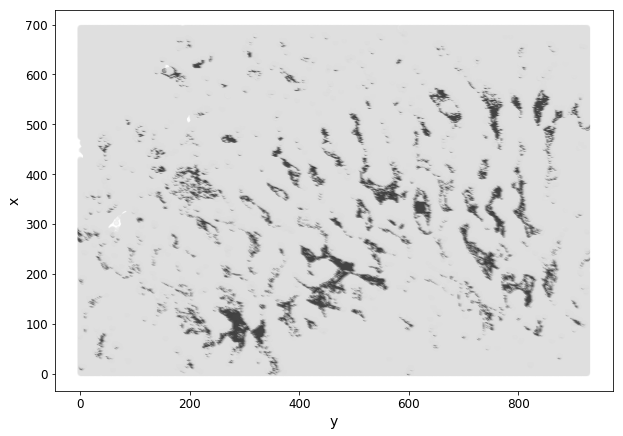

In [16]:
dataset.plot(kind="scatter",x="y",y="x",alpha=0.4,c=dataset['ph1'].values,figsize=(10,7))

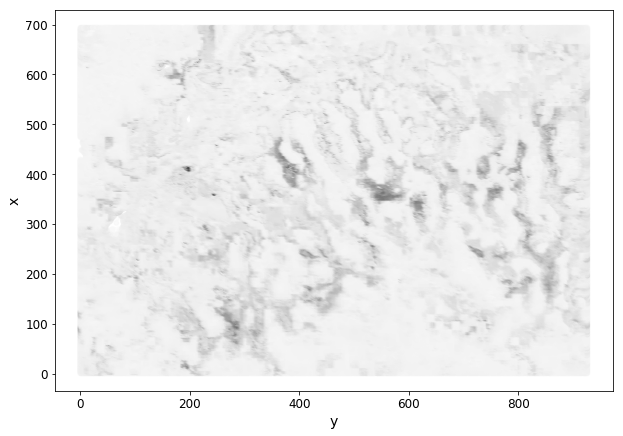

In [17]:
Predicted=Y_predicted.flatten()
dataset.plot(kind="scatter",x="y",y="x",alpha=0.4,c=Predicted,figsize=(10,7))

In [18]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(Predicted,Y_final))/np.std(Y_final)

0.9387434807454996

In [19]:
Predicted_Train=Y_train_predicted.flatten()
np.sqrt(mean_squared_error(Predicted_Train,Y_training))/np.std(Y_training)

0.9376113158317335

In [20]:
Predicted_Test=Y_test_predicted.flatten()
np.sqrt(mean_squared_error(Predicted_Test,Y_testing))/np.std(Y_testing)

0.9433617576465464

In [21]:
from hydroeval import *
v = evaluator(nse, np.array(Y_final), np.array(Predicted))
print(v)

[-8.57836823]
